# Шаг 1. Загрузка данных
## Используйте набор данных для задачи классификации изображений (например, набор данных CIFAR-10).

In [1]:
# импортируем библиотеки 
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os


from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Так как в данной работе будет использоваться пользовательский датасет с фото кошки Шоши, необходимо его разметить для дальнейшего обучения модели. То есть поменять имена файлов-фото. Фотографии в папке уже имеют свои уникальные названия, по этому остается добавить префикс, для того, чтобы нейросеть в последствии поняла, что на фото именно Шоша, а не другая кошка.

In [2]:
# импортируем библиотеку для работы с операционной системой
import os

# зададим переменную с путем к директории с фото Шоши
shosha_dir = "C://Users//Sofia//Documents//Курс нейросети//Практическое задание №4//Shosha_photos"

'''
# определим префикс для метки класса Шоши
shosha_prefix = "shosha_"
'''

# получим список файлов в директории
shosha_files = os.listdir(shosha_dir)

''''
# напишем цикл, которые переименует файлы путем добавления префикса
for file_name in shosha_files: # для всех файлов в списке
    if not file_name.startswith(shosha_prefix): # если имя начинается не с выбранного префикса
        # задаем новое имя файла
        new_file_name = shosha_prefix + file_name # конкатенируем имя файла и префикс
        # задаем пути к файлам
        old_path = os.path.join(shosha_dir, file_name)
        new_path = os.path.join(shosha_dir, new_file_name)
        # переименовываем файл
        os.rename(old_path, new_path)

print("Разметка данных завершена.")'''

'\'\n# напишем цикл, которые переименует файлы путем добавления префикса\nfor file_name in shosha_files: # для всех файлов в списке\n    if not file_name.startswith(shosha_prefix): # если имя начинается не с выбранного префикса\n        # задаем новое имя файла\n        new_file_name = shosha_prefix + file_name # конкатенируем имя файла и префикс\n        # задаем пути к файлам\n        old_path = os.path.join(shosha_dir, file_name)\n        new_path = os.path.join(shosha_dir, new_file_name)\n        # переименовываем файл\n        os.rename(old_path, new_path)\n\nprint("Разметка данных завершена.")'

In [3]:
# посмотрим, сколько фото Шоши нам доступно
file_count = len(shosha_files)

print(f"Количество файлов в директории: {file_count}")

Количество файлов в директории: 2


## Загрузите данные и разделите их на тренировочный и тестовый наборы.

In [4]:

directory_path = "C://Users//Sofia//Documents//Курс нейросети//Практическое задание №4//Shosha_photos"

file_list = os.listdir(directory_path)

train_files, test_files = train_test_split(file_list, test_size=0.25, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)

"""
train_dir = os.path.join(directory_path, "train")
val_dir = os.path.join(directory_path, "val")
test_dir = os.path.join(directory_path, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for file in train_files:
    src_path = os.path.join(directory_path, file)
    dst_path = os.path.join(train_dir, file)
    os.rename(src_path, dst_path)

for file in val_files:
    src_path = os.path.join(directory_path, file)
    dst_path = os.path.join(val_dir, file)
    os.rename(src_path, dst_path)

for file in test_files:
    src_path = os.path.join(directory_path, file)
    dst_path = os.path.join(test_dir, file)
    os.rename(src_path, dst_path)

print("Данные успешно разделены на обучающую, валидационную и тестовую выборки.")"""


ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 500, 400
batch_size = 10

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    directory_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

class_names = train_generator.class_indices
print(f"Class names: {class_names}")


Found 338 images belonging to 2 classes.
Found 338 images belonging to 2 classes.
Found 338 images belonging to 2 classes.
Class names: {'not_shosha': 0, 'shosha': 1}


# Шаг 2. Создание сверточной нейронной сети

## Импортируйте необходимые библиотеки, такие как TensorFlow и Keras.

Импортированы в начале документа

## Создайте сверточную нейронную сеть с несколькими сверточными слоями, слоями подвыборки (pooling), плотными слоями и выходным слоем.

In [6]:
img_height, img_width = 500, 400
num_classes = len(class_names)

In [10]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    # аугментация
	layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
	layers.experimental.preprocessing.RandomRotation(0.1),
	layers.experimental.preprocessing.RandomZoom(0.1),
	layers.experimental.preprocessing.RandomContrast(0.2),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes)
])

# Шаг 3. Обучение сверточной нейронной сети

## Настройте параметры обучения, такие как оптимизатор, функция потерь и метрики.

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 400, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 500, 400, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 500, 400, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 500, 400, 3)       0         
                                                                 
 random_contrast_1 (RandomC  (None, 500, 400, 3)       0         
 ontrast)                                                        
                                                                 
 conv2d_2 (Conv2D)           (None, 500, 400, 16)     

## Обучите сверточную нейронную сеть на тренировочных данных с использованием метода fit().

Epoch 1/5
34/34 [==============================] - 341s 10s/step - loss: 0.0336 - accuracy: 0.9852 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
34/34 [==============================] - 341s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
34/34 [==============================] - 286s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
34/34 [==============================] - 337s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
34/34 [==============================] - 292s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


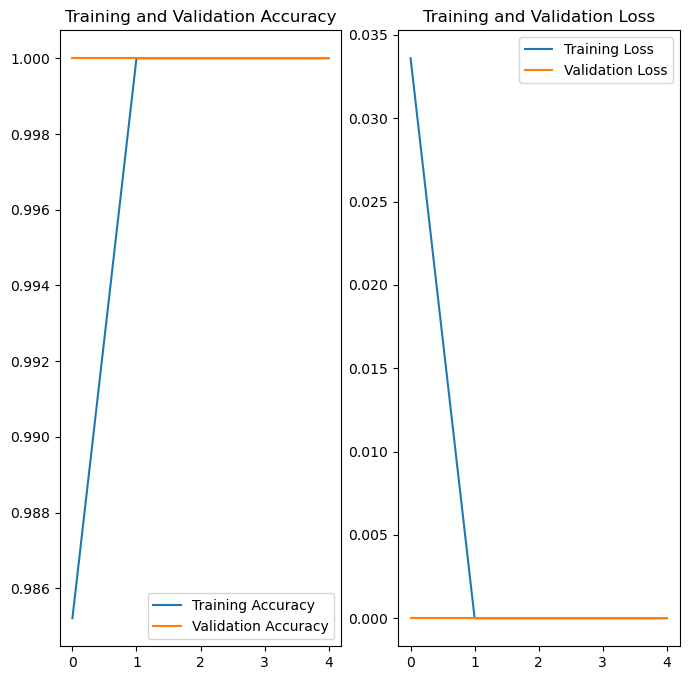

In [12]:
epochs = 5 
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 547ms/step
На изображении скорее всего {'not_shosha': 0, 'shosha': 1} (100.00% вероятность)


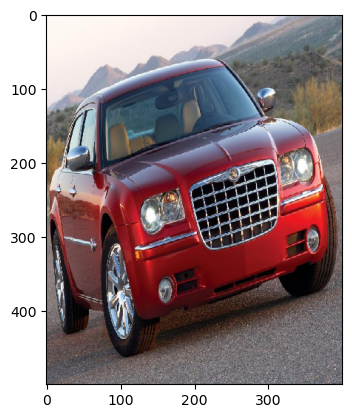

In [13]:
local_image_path = "C://Users//Sofia//Documents//2006-Chrysler-300C-Heritage-Edition-013.jpg"

img_height, img_width = 500, 400


img = tf.keras.utils.load_img(
    local_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    class_names,
    100 * np.max(score)))

plt.imshow(img)

img.show()

# Шаг 4. Оценка производительности модели

## Оцените производительность обученной модели на тестовых данных, используя метод evaluate()